# Project - Machine Learning :Predicting House Sale Prices using Linear Regression 

**Background and Introduction**: In this project, we will apply the machine learning algorithm linear regression to a practical problem i.e. prediction of house sale prices. The following equation is the general form of the simple or univariate linear regression model.
 $$\hat{y} = a_1x_1 + a_0$$
 
 y represents the target column while x1 represents the feature column we choose to use in our model. These values are independent of the dataset. On the other hand, a0 and a1 represent the parameter values that are specific to the dataset. The goal of simple linear regression is to find the optimal parameter values that best describe the relationship between the feature column and the target column. We can extend this logic to the multivariate case (often called multiple linear regression). A multiple linear regression model allows us to capture the relationship between multiple feature columns and the target column. Here's what the formula looks like:
$$\hat{y} = a_0 + a_1x_1 + a_2x_2 + ... + a_nx_n$$

**Dataset**: We will work with housing data for the city of Ames, Iowa, United States from 2006 to 2010. We can read more about why the data was collected [here](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627). We can also find details about the different columns in the data [here](https://s3.amazonaws.com/dq-content/307/data_description.txt).

**Prediction Strategy**: Since we are interested in predicting house prices based on available data, we will follow following strategy:

Cleaning and normalizing the data.
Feature Engineering
Selection of features most likely to impact house prices.
training, testing and cross-validation
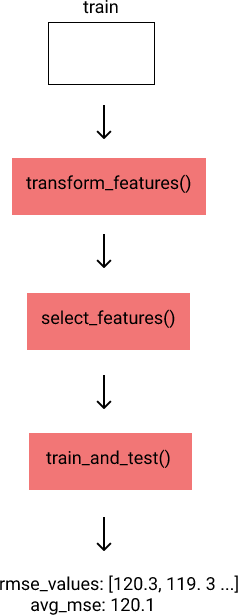

**Model Building** We will work with the [`sklearn.linear_model.LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class. `LinearRegression` fits a linear model with coefficients `w = (w1, …, wp)` to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.The LinearRegression class also has it's own `fit()` method. Specific to this model, however, are the coef_ and intercept_ attributes, which return a1 (a1 to an if it were a multivariate regression model) and a0 accordingly.

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score

# Setting pandas display options for large data
pd.options.display.max_rows = 200
pd.options.display.max_columns = 150

In [2]:
# Read the dataset, it's a tab delimited text file
housing_dataset = pd.read_csv("AmesHousing.tsv", delimiter="\t")

In [3]:
# Preliminary Data Exploration
housing_dataset.info()
# null_count = housing_dataset.isnull().sum()
# print(len(null_count.index))
# print(null_count)
# (null_count.index)[5:9]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [4]:
housing_dataset.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2771.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,559.262547,1051.614544,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1978.132443,1.766815,472.819734,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,439.494153,440.615067,391.890885,428.395715,46.310510,505.508887,0.524820,0.245254,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,25.528411,0.760566,215.046549,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.250000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.000000,990.000000,1084.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,802.000000,1302.000000,1384.000000,703.750000,0.000000,1742.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


### Setting up a Pipeline
In accordance with our strategy, we will set up a pipeline to facilitate repeated iterations for model tuning as under:
1. **Dealing with Missing Values**
    - Write a function for missing values
        - Categorize columns as 'Categorical' and 'numeric'
        - Identify numeric 'Categorical' columns
        - Identify date columns and change them to numeric values (ratio columns)
        - Select a threshhold for when to remove columns (missing values>40%) 
        - Select a critieria for fillin in missing values for both categorical and numeric columns (mode and mean).

In [5]:
def update_missing_values(df):
    ''' Cleans the dataset, removes columns with excessive missing values
    replaces missing values in numerical and categorical values with means and modes respectively
    Args
    df(dataframe): array or matrix like, input dataset
    Returns df (dataframe): array or matrix like, cleaned dataset'''
    
    cols = df.columns
    # Identify numeric cols
    numeric_cols = []
    for col in cols:
        if (df[col].dtype == 'int64') or (df[col].dtype == 'float64'):
            numeric_cols.append(col)
    # Identify categorical cols
    cat_cols = list(df.select_dtypes(include =['object']).columns)
    # Identify numeric categorical columns
    # Make a list of possible keywords (regex pattern) which indicate that the column does not have ordinal data
    # Use regex and loop over the numeric columns list and regex pattern list
    import re
    pattern_list = ['type', 'cond', 'val', 'qual', 'rank', 'year', 'order', 'id', 'class', 'yr', r'mo\s']
    numeric_cat_cols = []
    for col in numeric_cols:
        for pattern in pattern_list:
            if re.search(pattern, col, flags = re.I):
                numeric_cat_cols.append(col)
    # Identify date columns in the same manner using regex
    date_pattern_list = ['year', 'yr', r'mo\s']
    date_cols = []
    for col in numeric_cols:
        for pattern in date_pattern_list:
            if re.search(pattern, col, flags = re.I):
                date_cols.append(col)
    
   
    null_count = df.isnull().sum()
    cols = df.columns # Reassign variable 'cols' after adding two new columns above
    
    # drop columns with more than 40% missing values and those containing date values 
    df_new = df[cols[null_count <= 0.4*len(df.index)]].copy()
    df_new = df.drop(date_cols, axis = 1).copy()
    # Replace date columns with ratio columns 
    # 'age_sold' = (year sold - year built), 'age_rebuilt' = (year remodeled - year built) 
    df_new['age_sold'] = df[date_cols[-1]] - df[date_cols[0]]
    df_new['age_rebuilt'] = df[date_cols[1]] - df[date_cols[0]]
    # Fill missing values
    # First reassign the different columns lists due to changes in columns above
    # All categorical columns (text and numeric) missing values to be filled with mode
    # All numeric columns (except numeric categorical columns) missing values to be filled with mode
    new_numeric_cols = list(df.select_dtypes(include =['int64', 'float64']).columns)
    new_cat_cols = list(df.select_dtypes(include =['object']).columns)
    new_numeric_cat_cols = []
    for col in new_numeric_cols:
        for pattern in pattern_list:
            if re.search(pattern, col, flags = re.I):
                new_numeric_cat_cols.append(col)
    
    # Remove numerical categorical columns from the categorical columns list
    for col in new_numeric_cat_cols:
        new_numeric_cols.remove(col)
    # Replace missing values in categorical columns with the most frequently occuring value(mode)
    for col in new_cat_cols:   
        df_new[col] = df_new[col].fillna(df[col].value_counts(ascending=False).index[0])
    # Replace missing values in numerical columns with mean    
    df_new[new_numeric_cols] = df[new_numeric_cols].fillna(df[new_numeric_cols].mean())
    return df_new
   

In [6]:
# Check missing values
update_missing_values(housing_dataset).isnull().sum()


Order              0
PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Alley              0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bat

2. **Feature Selection - I (Split and Scale - Transform Features)**
    - First, we will write a function to split the dataframe into training and test sets according to desired number of folds (k folds) and carry out min-max scaling of numerical columns    

In [7]:
def transform_features(df, k=2):
    ''' Splits the dataframe into training and test sets as per number of folds, 
    scales numeric-feature values between 0 and 1
    Args
    df: dataframe, matrix like
    k (int): number of folds; default = 2 (50% split between training and test)
    Returns (dataframes): Cleaned and min_max scaled training dataset 
    and test dataset, split in proportion to number of folds'''
    # use the update_missing_values function to clean dataset and replace missing values
    
    # generate various combinations of trainining and test sets in accordance with number of folds
    # Applly the function 'update_missing_values' along with splitting to ensure cleaning of data and imputing missing values
    
    train = update_missing_values(df.head(int((1-1/k)*len(df.index))))
    test = update_missing_values(df.tail(len(df.index) - len(train.index)))
    # rescale train dataset using min-max scaling on numeric cols of train dataset except SalePrice column
    # Also remove numeric_cat columns from the numeric columns list
    numeric_cols = list(train.select_dtypes(include =['int64', 'float64']).columns)
    # Remove SalePrice column from column list
    numeric_cols.remove('SalePrice')
    pattern_list = ['type', 'cond', 'val', 'qual', 'rank', 'year', 'order', 'id', 'class', 'yr', r'mo\s']
    import re
    numeric_cat_cols = []
    for col in numeric_cols:
        for pattern in pattern_list:
            if re.search(pattern, col, flags = re.I):
                numeric_cat_cols.append(col)
    # Remove numeric categorical columns from numeric columns list   
    for col in numeric_cat_cols:            
        numeric_cols.remove(col)
     # Apply min-max scaling to numeric columns of training and test set
    scaled_train = (train[numeric_cols] - train[numeric_cols].min()) / (train[numeric_cols].max() - train[numeric_cols].min())
    scaled_test = (test[numeric_cols] - test[numeric_cols].min()) / (test[numeric_cols].max() - test[numeric_cols].min())
    # Add 'SalePrice' column
    scaled_train['SalePrice'] = train['SalePrice']
    scaled_test['SalePrice'] = test['SalePrice']
    # Return a list of training and test dataframes in which first item is training set and second item is test set
    # Apply the function to clean the respective datasets and update missing values
    return [scaled_train, scaled_test]

In [8]:
# Check Results of feature transformation of training dataset
transform_features(housing_dataset)[0].describe()

,Lot Frontage,Lot Area,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,age_sold,age_rebuilt,SalePrice
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,0.164050,0.040069,0.079589,0.195996,0.033653,0.234964,0.327096,0.335612,0.184996,0.351834,0.149590,0.056011,0.391809,0.193174,0.474061,0.024915,0.341570,0.198635,0.354130,0.318574,0.138093,0.085031,0.051139,0.006502,0.028164,0.000683,0.277996,0.113983,179878.498976
std,0.070614,0.033377,0.135144,0.194242,0.110672,0.184177,0.133468,0.160598,0.232006,0.152059,0.176864,0.229943,0.136373,0.254511,0.138331,0.111927,0.155453,0.215655,0.150313,0.142651,0.181691,0.117929,0.137547,0.058724,0.099966,0.026126,0.223423,0.195275,78400.026435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12789.000000
25%,0.133562,0.028979,0.000000,0.000000,0.000000,0.094606,0.245789,0.211704,0.000000,0.238172,0.000000,0.000000,0.250000,0.000000,0.333333,0.000000,0.200000,0.000000,0.200000,0.225806,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066176,0.007812,129000.000000
50%,0.164050,0.038000,0.000000,0.165647,0.000000,0.197774,0.309420,0.308090,0.000000,0.339922,0.000000,0.000000,0.500000,0.000000,0.500000,0.000000,0.300000,0.333333,0.400000,0.322581,0.000000,0.047532,0.000000,0.000000,0.000000,0.000000,0.264706,0.007812,160000.000000
75%,0.198630,0.047250,0.127907,0.320367,0.000000,0.334760,0.407361,0.434596,0.386139,0.430006,0.333333,0.000000,0.500000,0.500000,0.500000,0.000000,0.400000,0.333333,0.400000,0.387097,0.251497,0.127971,0.000000,0.000000,0.000000,0.000000,0.404412,0.164062,214000.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,615000.000000


In [9]:
transform_features(housing_dataset)[1].describe()

,Lot Frontage,Lot Area,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,age_sold,age_rebuilt,SalePrice
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,0.166242,0.054865,0.063202,0.077396,0.032627,0.264580,0.172595,0.174995,0.162029,0.220916,0.206967,0.033128,0.521957,0.186348,0.358020,0.519454,0.343870,0.150683,0.440745,0.332582,0.066894,0.065438,0.023647,0.005826,0.035867,0.005485,0.279541,0.105437,181713.621160
std,0.075358,0.052388,0.114029,0.082639,0.114949,0.208230,0.074134,0.086051,0.210677,0.101621,0.259109,0.129741,0.186826,0.248117,0.103204,0.101880,0.122404,0.162270,0.192361,0.153586,0.092126,0.094800,0.067729,0.059847,0.124028,0.062648,0.233680,0.198431,81362.628458
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13100.000000
25%,0.133562,0.036338,0.000000,0.000000,0.000000,0.100325,0.130115,0.117412,0.000000,0.144876,0.000000,0.000000,0.333333,0.000000,0.250000,0.500000,0.230769,0.000000,0.250000,0.222144,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046512,0.000000,129850.000000
50%,0.166242,0.048900,0.000000,0.063785,0.000000,0.217371,0.161702,0.157110,0.000000,0.206858,0.000000,0.000000,0.666667,0.000000,0.375000,0.500000,0.307692,0.250000,0.500000,0.336389,0.000000,0.037736,0.000000,0.000000,0.000000,0.000000,0.263566,0.000000,160500.000000
75%,0.195205,0.062516,0.098125,0.130936,0.000000,0.379006,0.212111,0.221592,0.342373,0.267898,0.500000,0.000000,0.666667,0.500000,0.375000,0.500000,0.384615,0.250000,0.500000,0.406206,0.117978,0.094340,0.000000,0.000000,0.000000,0.000000,0.418605,0.137931,213133.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,755000.000000


In [10]:
transform_features(housing_dataset)[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Frontage    1465 non-null   float64
 1   Lot Area        1465 non-null   float64
 2   Mas Vnr Area    1465 non-null   float64
 3   BsmtFin SF 1    1465 non-null   float64
 4   BsmtFin SF 2    1465 non-null   float64
 5   Bsmt Unf SF     1465 non-null   float64
 6   Total Bsmt SF   1465 non-null   float64
 7   1st Flr SF      1465 non-null   float64
 8   2nd Flr SF      1465 non-null   float64
 9   Gr Liv Area     1465 non-null   float64
 10  Bsmt Full Bath  1465 non-null   float64
 11  Bsmt Half Bath  1465 non-null   float64
 12  Full Bath       1465 non-null   float64
 13  Half Bath       1465 non-null   float64
 14  Bedroom AbvGr   1465 non-null   float64
 15  Kitchen AbvGr   1465 non-null   float64
 16  TotRms AbvGrd   1465 non-null   float64
 17  Fireplaces      1465 non-null   f

2. **Feature Selection - II (Scatter Plot)**
    - Write a function to plot linearity of all (numerical) features versus `SalePrice` column (scatter plot) in training dataset 

In [11]:
def scatter_plot(df):
    ''' Plots scatter plots of various (numerical) features in the training dataset versus target column 
    Args
    df: dataframe, matrix like
    Returns (matplotlib figure object): Scatter plots of features versus target on the same figure object 
    '''
    
    # Extract features and target from training dataset using the function 'transform_features'
    # transform_features() automatically also cleans the data,imputes missing values and splits dataset into training and test sets
    features = list(transform_features(df)[0].columns)[:-1]
    target = transform_features(df)[0].columns[-1]
    
    fig = plt.figure(figsize=(14, 54))
    plt.style.use('fivethirtyeight')
    
    for i, feature in enumerate(features, 1): # use enumerate to set the counter for use in subplots
        ax = fig.add_subplot(len(features),2,i)
        ax.scatter(x = transform_features(df)[0][feature], y= transform_features(df)[0][target])
        ax.set_xlabel(feature, fontsize = 16)
    plt.tight_layout() # tight_layout() prevents spill over of data and labels among subplots
    plt.show()

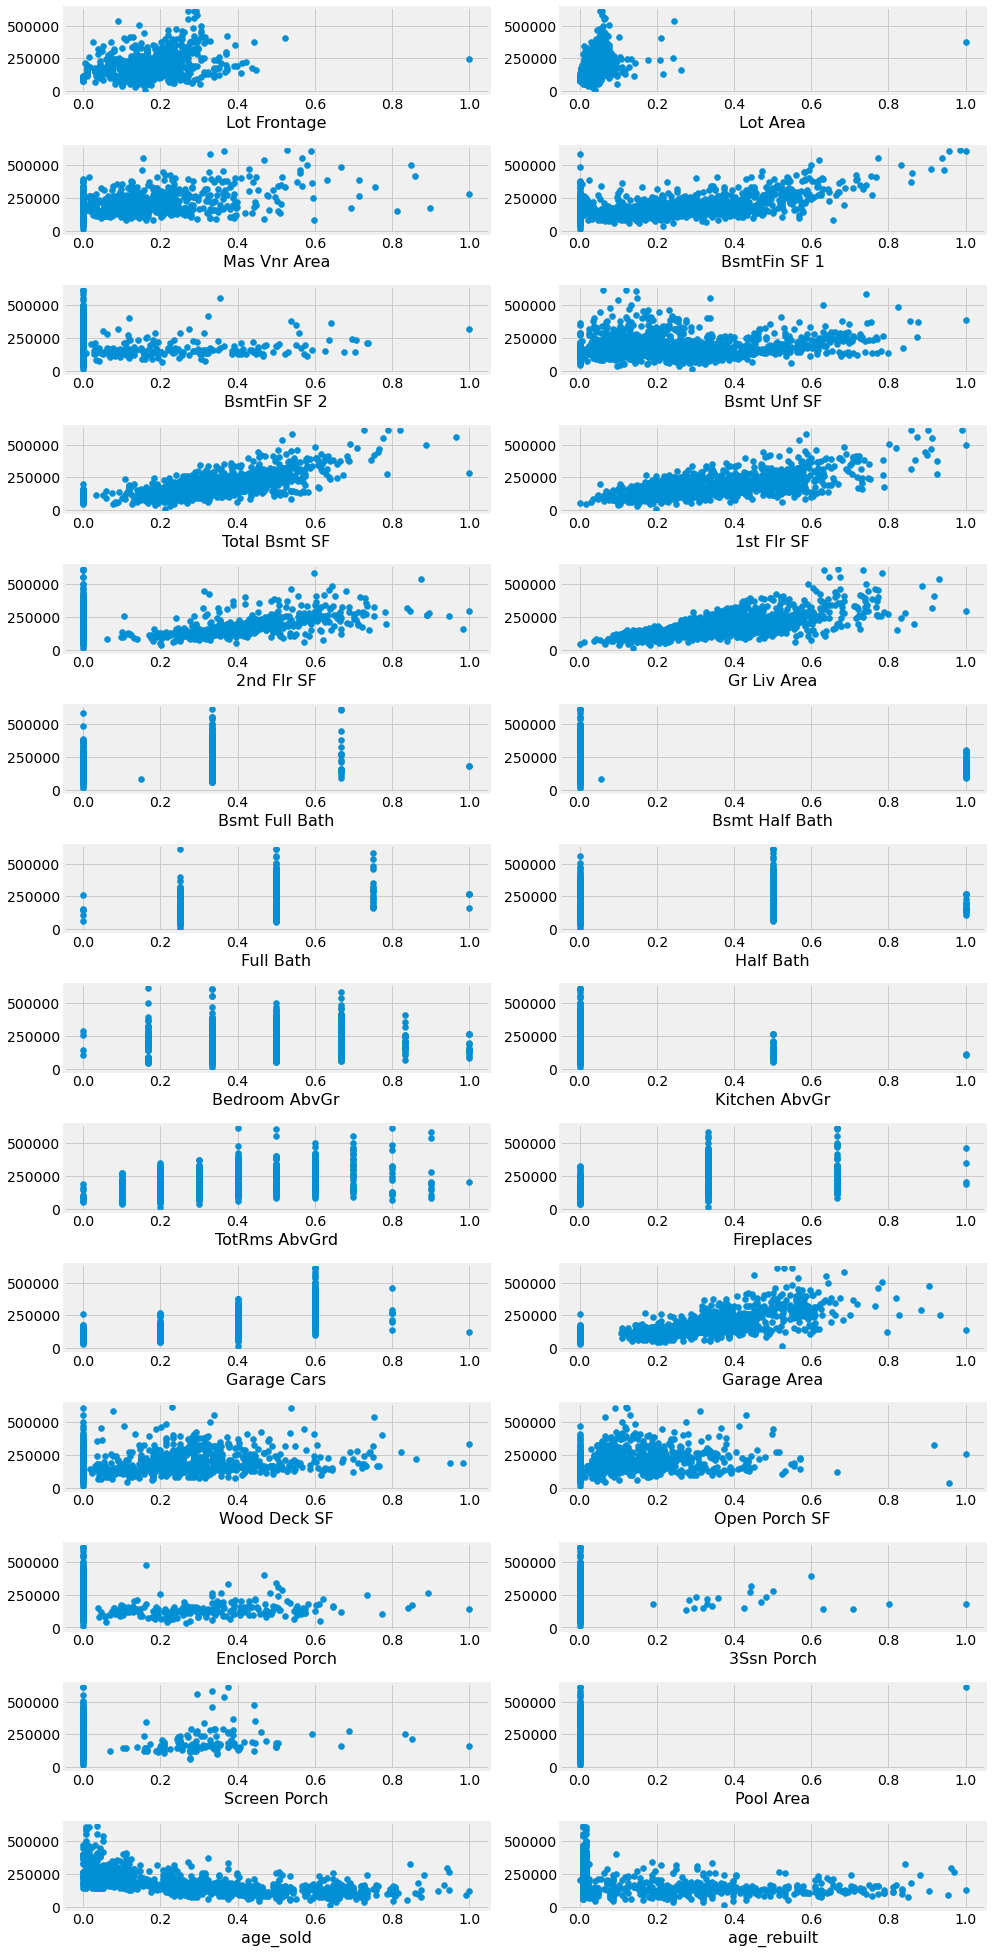

In [12]:
# Plot various features against SalePrice column
scatter_plot(housing_dataset)

3. **Feature Selection - III (Correlation and Heatmap)**
From above scatter plots, a number of features seem to have a linear relationship with the target column. We will further explore this by determining correlation. For this we will, 
    - Write a function to select features automatically based on a correlation threshhold
    - Plot heatmap of all (numerical) features versus `SalePrice` column in training dataset.

In [13]:
def select_features(df, ct=0.3, k=2):
    ''' Selects features for training and prediction based on correlation threshhold provided 
    Args
    df: dataframe, matrix like
    ct(float): correlation threshhold, default = 0.3
    Returns (matplotlib figure object): Scatter plots of features versus target on the same figure object 
    '''
    # Use the transform_features function to extract features and target from the dataframe
    cols = list(transform_features(df)[0].columns)
    features = list(transform_features(df)[0].columns)[:-1]
    target = transform_features(df)[0].columns[-1]
    # Find correlation among features and reduce to values valid for target column
    # find the absolutes values and sort them
    corrs = transform_features(df)[0][cols].corr().abs()
    corrs_target = corrs[target].sort_values(ascending=False)
    # Select features based on threshhold
    selected_feature = list(corrs_target[corrs_target >= ct].index)
    # Remove the target from the list
    selected_feature.remove(target)
    return pd.Series(selected_feature) # return a series object instead of a list

In [14]:
select_features(housing_dataset)

0        Gr Liv Area
1      Total Bsmt SF
2        Garage Cars
3        Garage Area
4         1st Flr SF
5           age_sold
6          Full Bath
7       Mas Vnr Area
8       BsmtFin SF 1
9         Fireplaces
10     TotRms AbvGrd
11      Lot Frontage
12     Open Porch SF
13      Wood Deck SF
14    Bsmt Full Bath
dtype: object

<function matplotlib.pyplot.show(*args, **kw)>

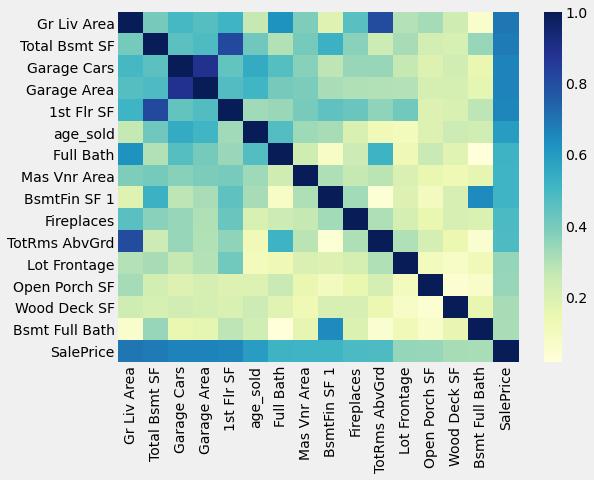

In [15]:
# Plot a heatmap of selected features
fig = plt.figure(figsize=(8, 6))
plt.style.use('fivethirtyeight')
mat = transform_features(housing_dataset)[0][select_features(housing_dataset)]
# Add target column
mat['SalePrice'] = transform_features(housing_dataset)[0].iloc[:,-1]
corrmat = mat.corr().abs()
sns.heatmap(corrmat, cmap="YlGnBu")
plt.show

In [16]:
# Reconfirm correlations of selected features with target column
print(corrmat['SalePrice'])

Gr Liv Area       0.699537
Total Bsmt SF     0.682929
Garage Cars       0.664468
Garage Area       0.663488
1st Flr SF        0.656942
age_sold          0.593622
Full Bath         0.519375
Mas Vnr Area      0.515546
BsmtFin SF 1      0.512804
Fireplaces        0.485892
TotRms AbvGrd     0.484053
Lot Frontage      0.347671
Open Porch SF     0.343910
Wood Deck SF      0.318280
Bsmt Full Bath    0.314595
SalePrice         1.000000
Name: SalePrice, dtype: float64


**Correcting Overfitting**
The heat map indicates that some features are very closely correlated with each other. This `overfitting` might impact the final results, so we need to modify the `select_features` function in order to take care of overfitting. For now, we will do it manually, and later amend the function. 
```
features = select_features(df, ct=0.3, k=i).drop(['Total Bsmt SF', 'Garage Cars', 'otRms AbvGrd'])
```

### Training, Testing and Cross Validation
We will now train, test and cross-validate univariate and multivariate models for selected features and select the optimum model using cross-validation
- First, we will write a function to train and test models with any number of folds and any correlation threshhold.
- univariate models for each selected feature
- Then we will group selected features according to their correlation ranking in groups of 2, 3, 4,....n, where n is the total number of selected features, and train, test and cross-validate these multi-variate models

**Model Testing, Training and Tuning - I (Univariate Cases)**
- First, we will write a function to train and test models with any number of k-folds and any correlation threshhold between features and target.

In [17]:
def lr_train_test_univariate(df, k=2, ct=0.3, target = 'SalePrice'):
    """ Cleans the dataset, imputes missing values, splits datasets into training and test sets according to number of folds,
    selects features based on correlation threshhold among features and target, 
    trains the model and predicts root mean squared error(RMSE) values for target features 
    Args:
    df (matrix, dataframe): dataframe like or matrix like
    k(int): k-folds for splitting dataset
    ct(float): Pearson's correlation coefficient threshhold between features and target
    target(array like): target df feature
    Returns:
    Array: RMSE values for the range of k=folds specified
    """
    features = select_features(df = df, k = k, ct = ct).drop(labels = [1, 2, 10]).reset_index(drop=True) # Remove features to avoid overfitting
    
    train = transform_features(df = df, k=k)[0][features]
    # Add target Column
    train[target] = transform_features(df = df, k=k)[0][target]
    # Add target Column
    test = transform_features(df = df, k = k)[1][features]
    test[target] = transform_features(df = df, k = k)[1][target]
    
    lr = LinearRegression()
    train_rmse_values = []
    test_rmse_values = []
    for feature in features:        
        lr.fit(train[[feature]], train[target])
        train_predictions = lr.predict(train[[feature]]) # We need to predict for the training set as well
        test_predictions = lr.predict(test[[feature]]) 
        train_mse = mean_squared_error(train_predictions, train[target])
        test_mse = mean_squared_error(test_predictions, test[target])
        train_rmse = np.sqrt(train_mse)
        test_rmse = np.sqrt(test_mse)
#         train_rmse_values.append(feature) # if needed to print feature names with rmse values
        train_rmse_values.append(train_rmse)
#         test_rmse_values.append(feature) # if needed to print feature names with rmse values
        test_rmse_values.append(test_rmse)
        
    
    return [train_rmse_values, test_rmse_values]      

In [18]:
# Training dataset rmse values for each feature, k = 2
lr_train_test_univariate(housing_dataset)[0]

[56005.217429556425,
 58637.88376829443,
 59088.85634103881,
 63070.40421551882,
 66973.58859378891,
 67155.08360688074,
 67283.9136954212,
 68499.69582762515,
 73484.06393333082,
 73592.70841565132,
 74297.60283686062,
 74393.95145605135]

In [19]:
# Training dataset rmse values for each feature, k = 5
lr_train_test_univariate(housing_dataset, k=5)[0]

[58127.254498892216,
 62314.53745487544,
 63090.702102867304,
 66496.1310144202,
 68124.05147595512,
 69419.30271578858,
 72801.36106103059,
 71006.67265745853,
 76123.38470639838,
 76974.14729626851,
 76915.50426023571,
 77758.04056890406]

In [20]:
# Test dataset rmse values for each feature, k = 2
lr_train_test_univariate(housing_dataset)[1]

[78140.05153669385,
 64215.93109184163,
 87004.07868196556,
 69476.91173733852,
 76957.72992985389,
 71182.95790683379,
 81259.94737566516,
 73355.0268932875,
 76680.02836402833,
 78219.23438537894,
 78873.05867563661,
 80955.41809047079]

In [21]:
# Test dataset rmse values for each feature, k = 2
lr_train_test_univariate(housing_dataset, k=5)[1]

[83927.09431255271,
 70083.51001696513,
 174126.4234990232,
 65498.88450520311,
 76480.05866477478,
 67579.1892850194,
 120998.95308979055,
 67572.4010575006,
 95514.08933111538,
 75486.45649918634,
 72596.15542134087,
 74512.98144653268]

**Plotting rmse Values**
We will now plot rmse values for each feature as a bar plot for both training and test sets while splitting the data into k-folds between 2 and 5.

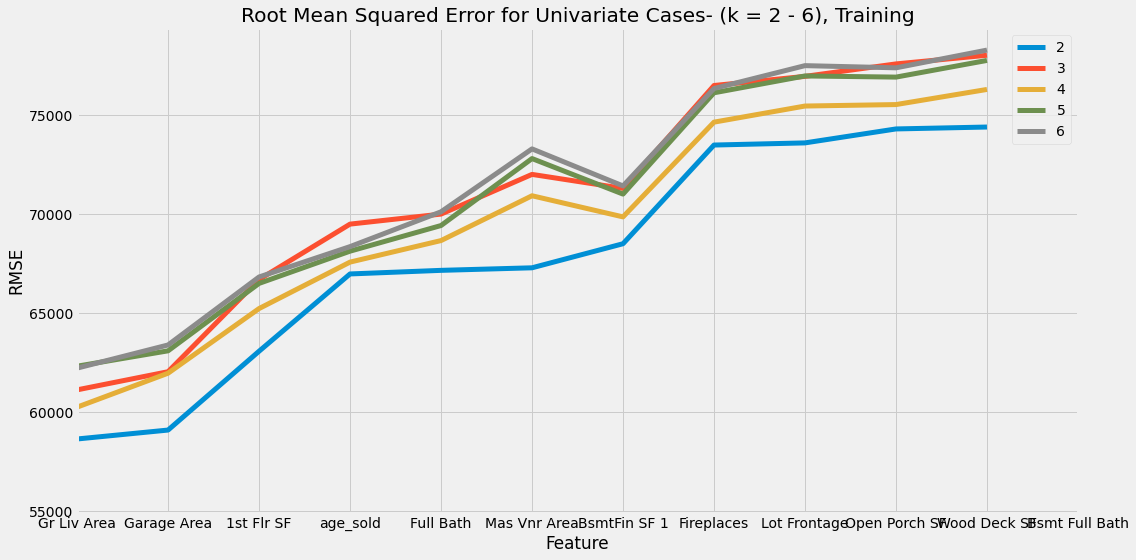

In [22]:
# Plot for training dataset
# Remove features to avoid overfitting
features = select_features(housing_dataset).drop(labels = [1, 2, 10]).reset_index(drop=True)
fig = plt.figure(figsize=(16, 8))
plt.style.use('fivethirtyeight')
for i in range(2, 7): 
    plt.plot(lr_train_test_univariate(housing_dataset, k = i)[0], linewidth = 5, label = i)
plt.xlabel("Feature")
plt.ylabel('RMSE')
plt.xlim(1, len(features))
plt.xticks(ticks = [i for i in range(1, len(features)+1)], labels = features)
plt.legend()
plt.title('Root Mean Squared Error for Univariate Cases- (k = 2 - 6), Training')
plt.tight_layout() # tight_layout() prevents spill over of data and labels among subplots
plt.rcParams['font.size'] = '10'
plt.show()

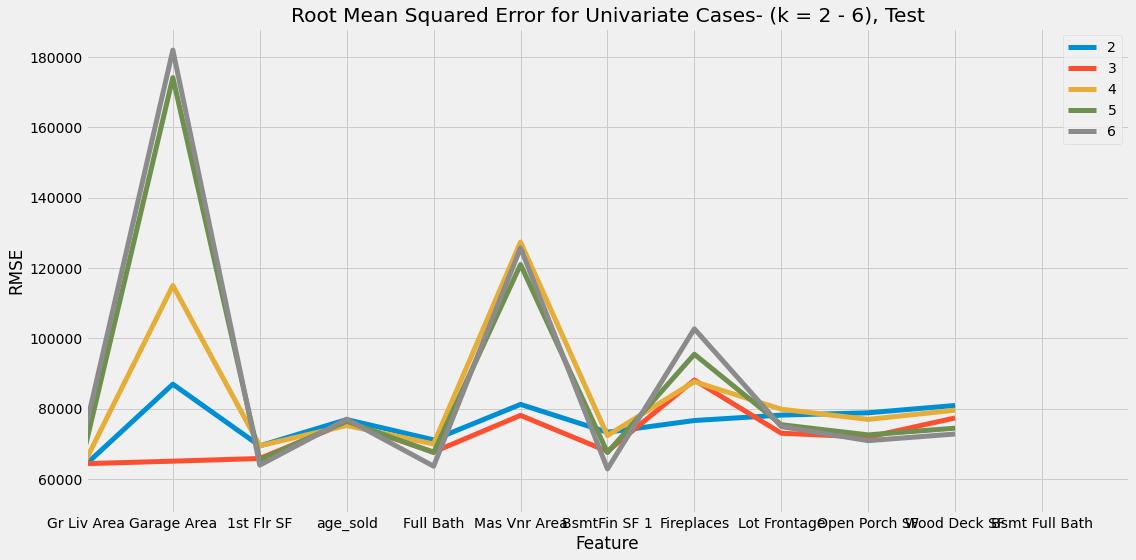

In [23]:
# Plot for test dataset
 # Remove features to avoid overfitting
features = select_features(housing_dataset).drop(labels = [1, 2, 10]).reset_index(drop=True)
fig = plt.figure(figsize=(16, 8))
plt.style.use('fivethirtyeight')
for i in range(2, 7): 
    plt.plot(lr_train_test_univariate(housing_dataset, k = i)[1], linewidth = 5, label = i)
plt.xlabel("Feature")
plt.ylabel('RMSE')
plt.xlim(1, len(features)+1)
plt.xticks(ticks = [i for i in range(1, len(features)+1)], labels = features)
plt.legend()
plt.title('Root Mean Squared Error for Univariate Cases- (k = 2 - 6), Test')
plt.tight_layout() # tight_layout() prevents spill over of data and labels among subplots
plt.rcParams['font.size'] = '10'
plt.show()

**Model Testing, Training and Tuning - II (Multivariate Cases)**

- From consideration of univariate cases following conclusions can be drawn:
 ` Best performing models are split at k-fold value of 2 for training set and k-fold value of 3 for test set
 - Some features such as `Fireplaces`, `Lot Frontage`, `Open Porch SF`, `Wood Deck SF`, `Bsmt Full Bath`  give constant performance at all fold values, so we can drop some of these features to avoid overfitting

- First, we will write a function for the multi-variate case
- Then we will group selected features according to their rmse values in groups of 2, 3, 4,....n, where n is the total number of selected features, and train, test and cross-validate these multi-variate models at various k-fold values

In [24]:
def lr_train_test_multivariate(df, k=2, ct=0.3, target = 'SalePrice'):
    """ Cleans the dataset, imputes missing values, splits datasets into training and test sets according to number of folds,
    selects features based on correlation threshhold among features and target, 
    creates feature_groups based on number of features 
    trains the model and predicts root mean squared error(RMSE) values for target features 
    Args:
    df (matrix, dataframe): dataframe like or matrix like
    k(int): k-folds for splitting dataset
    ct(float): Pearson's correlation coefficient threshhold between features and target
    target(array like): target df feature
    Returns:
    Array: RMSE values for the range of k=folds specified
    """
    # Drop more features
    features = select_features(df = df, k = k, ct = ct).drop(labels = [1, 2, 7, 10, 11, 14]).reset_index(drop=True) # Remove features to avoid overfitting
    # Make a dictionary of feature_groups from groups of 2, 3, 4....n
    feature_groups = {}
    
    for i in range(1, len(features)+1):
        feature_groups[str(i+1)+'_features'] = list(features[0:i+1])
   
    # Use function transform_features to create training and test datasets
    train = transform_features(df = df, k=k)[0][features]
    # Add target Column
    train[target] = transform_features(df = df, k=k)[0][target]
    # Add target Column
    test = transform_features(df = df, k = k)[1][features]
    test[target] = transform_features(df = df, k = k)[1][target]
    
    lr = LinearRegression()
    train_rmse_values = []
    test_rmse_values = []
    for group in feature_groups:   
        lr.fit(train[feature_groups[group]], train[target])
        train_predictions = lr.predict(train[feature_groups[group]]) # We need to predict for the training set as well
        test_predictions = lr.predict(test[feature_groups[group]]) 
        train_mse = mean_squared_error(train_predictions, train[target])
        test_mse = mean_squared_error(test_predictions, test[target])
        train_rmse = np.sqrt(train_mse)
        test_rmse = np.sqrt(test_mse)
#         train_rmse_values.append(feature) # if needed to print feature names with rmse values
        train_rmse_values.append(train_rmse)
#         test_rmse_values.append(feature) # if needed to print feature names with rmse values
        test_rmse_values.append(test_rmse)
        
    
    return [train_rmse_values, test_rmse_values]      

In [25]:
# Training dataset rmse values for each feature, k = 2
lr_train_test_multivariate(housing_dataset)[0]

[47388.73445708952,
 43513.413617098675,
 38527.77804417378,
 38290.540009559954,
 35602.888163140036,
 35411.671814562134,
 34975.419497995106,
 34857.482293161935,
 34857.482293161935]

In [26]:
# Training dataset rmse values for each feature, k = 2
lr_train_test_multivariate(housing_dataset)[1]

[62535.04010612586,
 71832.90415262246,
 67804.50436990509,
 74715.39131489521,
 73883.8463580121,
 72007.14245834004,
 72156.33312654687,
 72514.74321376043,
 72514.74321376043]

In [27]:
# Drom more features and group features as 2, 3, 4 .... n features to test various multi-variate combinations
features = select_features(housing_dataset).drop(labels = [1, 2, 7, 10, 11, 14]).reset_index(drop=True)
features

0      Gr Liv Area
1      Garage Area
2       1st Flr SF
3         age_sold
4        Full Bath
5     BsmtFin SF 1
6       Fireplaces
7    Open Porch SF
8     Wood Deck SF
dtype: object

In [28]:
# Make a dictionary of feature groups starting from 
feature_groups = {}
for i in range(1, len(features)):
    feature_groups[str(i+1)+'_features'] = list(features[0:i+1])
print(len(feature_groups))
print(feature_groups)  
print(list(feature_groups.keys()))

8
{'2_features': ['Gr Liv Area', 'Garage Area'], '3_features': ['Gr Liv Area', 'Garage Area', '1st Flr SF'], '4_features': ['Gr Liv Area', 'Garage Area', '1st Flr SF', 'age_sold'], '5_features': ['Gr Liv Area', 'Garage Area', '1st Flr SF', 'age_sold', 'Full Bath'], '6_features': ['Gr Liv Area', 'Garage Area', '1st Flr SF', 'age_sold', 'Full Bath', 'BsmtFin SF 1'], '7_features': ['Gr Liv Area', 'Garage Area', '1st Flr SF', 'age_sold', 'Full Bath', 'BsmtFin SF 1', 'Fireplaces'], '8_features': ['Gr Liv Area', 'Garage Area', '1st Flr SF', 'age_sold', 'Full Bath', 'BsmtFin SF 1', 'Fireplaces', 'Open Porch SF'], '9_features': ['Gr Liv Area', 'Garage Area', '1st Flr SF', 'age_sold', 'Full Bath', 'BsmtFin SF 1', 'Fireplaces', 'Open Porch SF', 'Wood Deck SF']}
['2_features', '3_features', '4_features', '5_features', '6_features', '7_features', '8_features', '9_features']


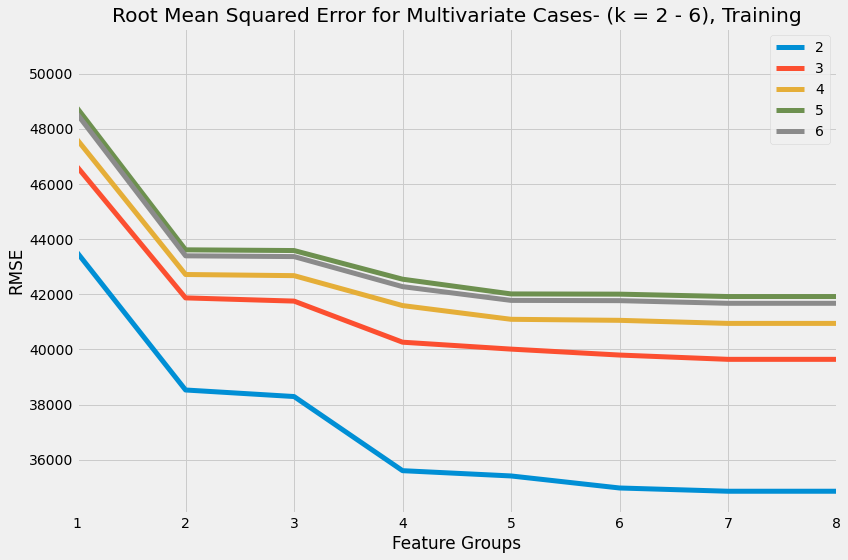

In [29]:
# Plot for training dataset
fig = plt.figure(figsize=(12, 8))
plt.style.use('fivethirtyeight')
for i in range(2, 7): 
    plt.plot(lr_train_test_multivariate(housing_dataset, k = i)[0], linewidth = 5, label = i)
plt.xlabel("Feature Groups")
plt.ylabel('RMSE')
plt.xlim(1, len(feature_groups))
# plt.xticks(ticks = [i for i in range(1, len(feature_groups)+1)], labels = list(feature_groups.keys()))
plt.legend()
plt.title('Root Mean Squared Error for Multivariate Cases- (k = 2 - 6), Training')
plt.tight_layout() # tight_layout() prevents spill over of data and labels among subplots
plt.rcParams['font.size'] = '10'
plt.show()

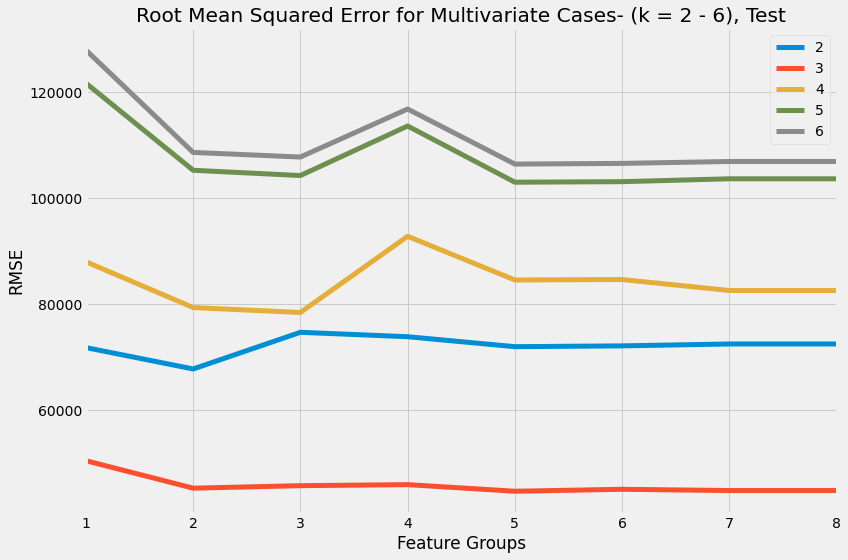

In [30]:
# Plot for training dataset
fig = plt.figure(figsize=(12, 8))
plt.style.use('fivethirtyeight')
for i in range(2, 7): 
    plt.plot(lr_train_test_multivariate(housing_dataset, k = i)[1], linewidth = 5, label = i)
plt.xlabel("Feature Groups")
plt.ylabel('RMSE')
plt.xlim(1, len(feature_groups))
# plt.xticks(ticks = [i for i in range(1, len(feature_groups)+1)], labels = list(feature_groups.keys()))
plt.legend()
plt.title('Root Mean Squared Error for Multivariate Cases- (k = 2 - 6), Test')
plt.tight_layout() # tight_layout() prevents spill over of data and labels among subplots
plt.rcParams['font.size'] = '10'
plt.show()

In [31]:
# Print rmse values for best models as well as their mean value at various groupings of features
print('k = 3, ', ' 9_features, ', ' rmse: ', lr_train_test_multivariate(housing_dataset, k = 3)[1])
print('mean for k = 3: ', np.mean(lr_train_test_multivariate(housing_dataset, k = 3)[1]))

k = 3,   9_features,   rmse:  [52801.24756555713, 50506.81098400353, 45336.246923056715, 45807.22457172923, 46002.057845993135, 44756.637487683394, 45125.1735033098, 44888.89377328727, 44888.89377328727]
mean for k = 3:  46679.24293643417


### Conclusion
We can draw following conclusions from above:
- The best performing models are the multivariate models which have near consistent performance in groups of 4 to 9 features
- The best model is the one with 9-features split at 3 folds i.e. 66% training data and 34% test with an rmse of 44888. The mean SalePrice of the entire data is approximately 181,000. So, this model is considerably accurate 
- Performance of models deprecates appreciably if training data is increased beyond 3 folds
- We can further fine-tune by manipulating correlation threshhold values